데이터 범위: 0.262390 - 0.924305
원본 데이터와 컬러 레벨 매칭:
최대값: 0.924305 → 컬러 레벨: 0.924305
최소값: 0.26239 → 컬러 레벨: 0.26239

컬러 레벨 배열:
[[0.924305 0.849563 0.73765  0.581764]
 [0.739207 0.604845 0.521634 0.439296]
 [0.550631 0.437291 0.379956 0.333988]
 [0.423225 0.33958  0.296105 0.26239 ]]


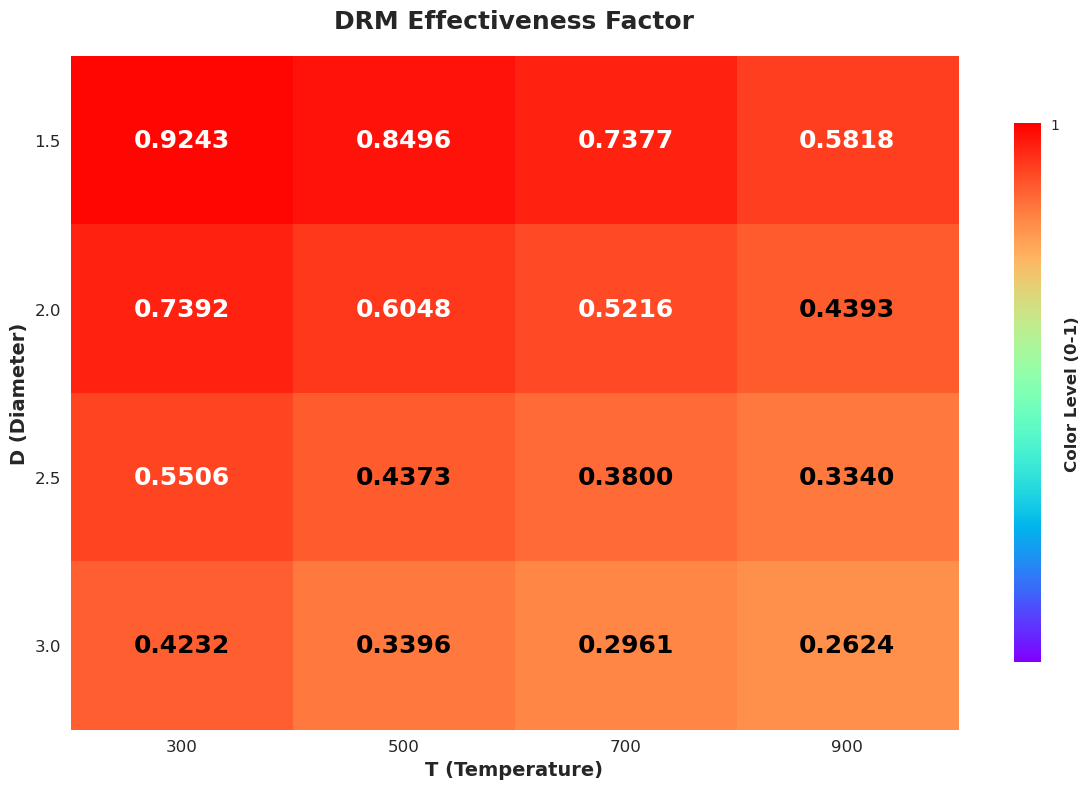


데이터 요약:
최대 효율성: 0.924305 (T=300, D=1.5)
최소 효율성: 0.262390 (T=900, D=3.0)
평균 효율성: 0.526339
Log10 범위: -0.581 - -0.034

Pivot Table:
T         300       500       700       900
D                                          
1.5  0.924305  0.849563  0.737650  0.581764
2.0  0.739207  0.604845  0.521634  0.439296
2.5  0.550631  0.437291  0.379956  0.333988
3.0  0.423225  0.339580  0.296105  0.262390


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

# 데이터 정의
data = {
    'T': [300, 500, 700, 900, 300, 500, 700, 900, 300, 500, 700, 900, 300, 500, 700, 900],
    'D': [3, 3, 3, 3, 2.5, 2.5, 2.5, 2.5, 2, 2, 2, 2, 1.5, 1.5, 1.5, 1.5],
    'eff': [
0.423225,
0.33958,
0.296105,
0.26239,
0.550631,
0.437291,
0.379956,
0.333988,
0.739207,
0.604845,
0.521634,
0.439296,
0.924305,
0.849563,
0.73765,
0.581764

    ]
}

# DataFrame 생성
df = pd.DataFrame(data)

# pivot table 생성 (heatmap용 2D 배열)
heatmap_data = df.pivot(index='D', columns='T', values='eff')

# Log10 스케일 heatmap 생성
plt.style.use('seaborn-v0_8')  # 최신 버전에서는 'seaborn-v0_8' 사용
fig, ax = plt.subplots(figsize=(12, 8))

# 데이터 범위 확인
vmin = df['eff'].min()
vmax = df['eff'].max()
print(f"데이터 범위: {vmin:.6f} - {vmax:.6f}")

# 데이터 값 자체를 컬러 레벨로 직접 사용 (0~1 범위)
color_levels = heatmap_data.values

# 컬러 레벨 확인
print("원본 데이터와 컬러 레벨 매칭:")
print("최대값:", df['eff'].max(), "→ 컬러 레벨:", color_levels.max())
print("최소값:", df['eff'].min(), "→ 컬러 레벨:", color_levels.min())
print("\n컬러 레벨 배열:")
print(color_levels)

# 데이터 값을 직접 컬러 레벨로 사용하되, 로그 스케일로 색상 매핑
# 최소값을 0.001로 클램핑 (로그 스케일에서 0은 처리할 수 없음)
color_levels_clamped = np.maximum(color_levels, 0.001)

im = ax.imshow(color_levels_clamped, 
               cmap='rainbow',  # 무지개색 (보라색 -> 파란색 -> 초록색 -> 노란색 -> 빨간색)
               norm=LogNorm(vmin=0.001, vmax=1.0),
               aspect='auto')

# 모든 격자선과 틱 제거
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_yticks(range(len(heatmap_data.index)))
ax.tick_params(length=0)  # 틱 마크 길이를 0으로 설정
ax.grid(False)  # 격자선 완전 제거

# 각 셀에 값 주석 추가
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        value = heatmap_data.iloc[i, j]
        
        # 로그 스케일로 정규화된 컬러 값 계산
        clamped_value = max(value, 0.001)  # 로그 스케일을 위해 최소값 클램핑
        norm_value = (np.log10(clamped_value) - np.log10(0.001)) / (np.log10(1.0) - np.log10(0.001))
        colormap = plt.cm.rainbow
        bg_color = colormap(norm_value)
        
        # RGB 값에서 밝기 계산 (luminance)
        luminance = 0.299 * bg_color[0] + 0.587 * bg_color[1] + 0.114 * bg_color[2]
        
        # 밝기에 따라 텍스트 색상 결정 (밝으면 검은색, 어두우면 흰색)
        text_color = 'black' if luminance > 0.5 else 'white'
        
        ax.text(j, i, f'{value:.4f}', 
               ha='center', va='center', 
               fontsize=18, fontweight='bold', 
               color=text_color)

# 축 라벨 설정 (격자선 없이)
ax.set_xticklabels(heatmap_data.columns, fontsize=12)
ax.set_yticklabels(heatmap_data.index, fontsize=12)
# 모든 spine(테두리선)도 제거하여 깔끔하게
for spine in ax.spines.values():
    spine.set_visible(False)

# 컬러바 추가 (0~1 범위)
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Color Level (0-1)', fontsize=12, fontweight='bold')

# 로그 단위로 틱 설정 (0.001, 0.01, 0.1, 1.0 등)
log_tick_values = [0.001, 0.01, 0.1, 1.0]
# 실제 데이터 범위에 맞게 필터링
valid_ticks = [tick for tick in log_tick_values if vmin <= tick <= 1.0]
if vmin < 0.001:
    valid_ticks.insert(0, 0.0001)

cbar.set_ticks(valid_ticks)

# 로그 스케일 값을 라벨로 사용
tick_labels = []
for tick in valid_ticks:
    if tick >= 1:
        tick_labels.append(f'{tick:.0f}')
    elif tick >= 0.1:
        tick_labels.append(f'{tick:.1f}')
    elif tick >= 0.01:
        tick_labels.append(f'{tick:.2f}')
    else:
        tick_labels.append(f'{tick:.3f}')
cbar.set_ticklabels(tick_labels)

plt.title('DRM Effectiveness Factor', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('T (Temperature)', fontsize=14, fontweight='bold')
plt.ylabel('D (Diameter)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 데이터 요약 출력
print("\n데이터 요약:")
print(f"최대 효율성: {df['eff'].max():.6f} (T={df.loc[df['eff'].idxmax(), 'T']}, D={df.loc[df['eff'].idxmax(), 'D']})")
print(f"최소 효율성: {df['eff'].min():.6f} (T={df.loc[df['eff'].idxmin(), 'T']}, D={df.loc[df['eff'].idxmin(), 'D']})")
print(f"평균 효율성: {df['eff'].mean():.6f}")
print(f"Log10 범위: {np.log10(df['eff'].min()):.3f} - {np.log10(df['eff'].max()):.3f}")
print("\nPivot Table:")
print(heatmap_data)
